In [ ]:
col_list = ["date","price"]
import pandas as pd
df = pd.read_csv("Wheat Flour Rajshahi Division.csv", usecols=col_list,parse_dates = ['date'])
df.head()

,date,price
0,2006-07-15,20.0000
1,2006-08-15,20.3636
2,2006-09-15,21.1667
3,2006-10-15,21.6154
4,2006-11-15,23.4545


In [ ]:
df.describe()

,price
count,184.000000
mean,31.735031
std,4.584632
min,20.000000
25%,30.292500
50%,31.941000
75%,34.789275
max,42.538500


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    184 non-null    datetime64[ns]
 1   price   184 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.0 KB


In [ ]:
df.columns = ['ds','y']
df.head()

,ds,y
0,2006-07-15,20.0000
1,2006-08-15,20.3636
2,2006-09-15,21.1667
3,2006-10-15,21.6154
4,2006-11-15,23.4545


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from fbprophet import Prophet
m = Prophet(interval_width = 0.95, weekly_seasonality = False,yearly_seasonality = False)
m.fit(df)
#Check Interval Width between 0.75 to 0.95 and weekly Seasonality and Yearly Seasonality True\False

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


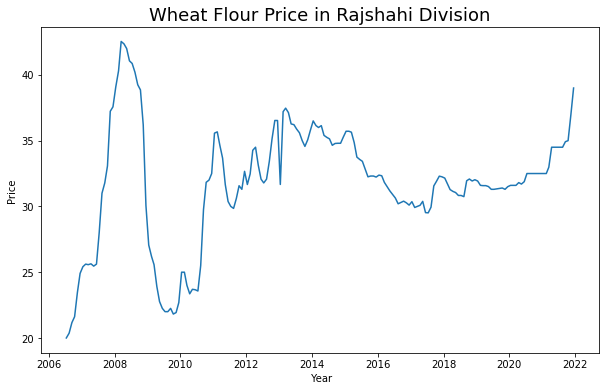

In [ ]:
plt.figure(facecolor='w',figsize=(10, 6))
plt.plot(df.ds,df.y)
plt.title('Wheat Flour Price in Rajshahi Division',size = 18)
plt.xlabel(' Year')
plt.ylabel('Price')
plt.show()

In [ ]:
future = m.make_future_dataframe(periods = 50,freq ='SMS')
forecast = m.predict(future)
forecast.tail(16)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
218,2023-06-01,32.984108,25.097639,41.323342,32.859077,33.105018,0.0,0.0,0.0,0.0,0.0,0.0,32.984108
219,2023-06-15,32.985573,24.931986,41.408766,32.856950,33.112070,0.0,0.0,0.0,0.0,0.0,0.0,32.985573
220,2023-07-01,32.987248,25.177998,41.684037,32.854520,33.122008,0.0,0.0,0.0,0.0,0.0,0.0,32.987248
221,2023-07-15,32.988714,25.145639,41.504015,32.852394,33.128476,0.0,0.0,0.0,0.0,0.0,0.0,32.988714
222,2023-08-01,32.990494,24.522267,41.675016,32.849812,33.139018,0.0,0.0,0.0,0.0,0.0,0.0,32.990494
223,2023-08-15,32.991959,24.117443,40.553048,32.847686,33.148085,0.0,0.0,0.0,0.0,0.0,0.0,32.991959
224,2023-09-01,32.993739,24.460034,41.465825,32.842345,33.155470,0.0,0.0,0.0,0.0,0.0,0.0,32.993739
225,2023-09-15,32.995205,24.907222,41.015618,32.836063,33.157543,0.0,0.0,0.0,0.0,0.0,0.0,32.995205
226,2023-10-01,32.996879,24.541407,41.494450,32.831796,33.164858,0.0,0.0,0.0,0.0,0.0,0.0,32.996879
227,2023-10-15,32.998345,24.607766,41.136265,32.829079,33.172123,0.0,0.0,0.0,0.0,0.0,0.0,32.998345


In [ ]:
df.shape

(184, 2)

In [ ]:
future.shape

(234, 1)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Text(0.5, 1.0, 'Forcasting Price of Wheat Flour in Rajshahi Division')

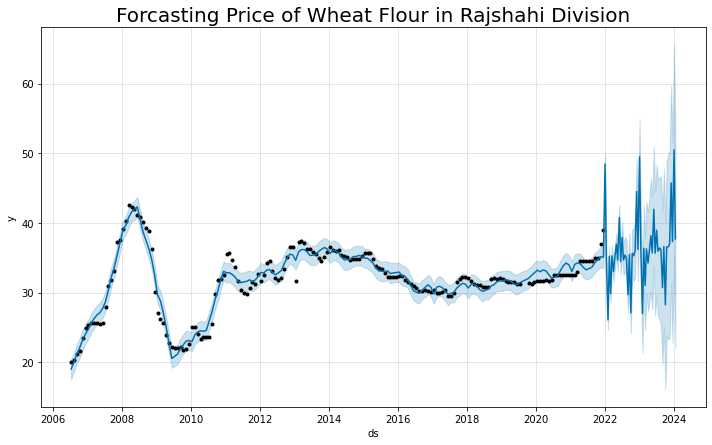

In [ ]:
m1 = Prophet(changepoint_prior_scale=0.5)
forecast1 = m1.fit(df).predict(future)
fig4 = m1.plot(forecast1)
a = fig4.gca()
a.set_title('Forcasting Price of Wheat Flour in Rajshahi Division',size=20)

In [ ]:
from fbprophet.diagnostics import cross_validation
cv = cross_validation(m,initial = '100 days', period='50 days', horizon='300 days')

INFO:fbprophet:Making 105 forecasts with cutoffs between 2006-11-24 00:00:00 and 2021-02-18 00:00:00


  0%|          | 0/105 [00:00<?, ?it/s]

INFO:fbprophet:n_changepoints greater than number of observations. Using 3.
INFO:fbprophet:n_changepoints greater than number of observations. Using 3.
INFO:fbprophet:n_changepoints greater than number of observations. Using 5.
INFO:fbprophet:n_changepoints greater than number of observations. Using 7.
INFO:fbprophet:n_changepoints greater than number of observations. Using 7.
INFO:fbprophet:n_changepoints greater than number of observations. Using 9.
INFO:fbprophet:n_changepoints greater than number of observations. Using 11.
INFO:fbprophet:n_changepoints greater than number of observations. Using 11.
INFO:fbprophet:n_changepoints greater than number of observations. Using 13.
INFO:fbprophet:n_changepoints greater than number of observations. Using 15.
INFO:fbprophet:n_changepoints greater than number of observations. Using 15.
INFO:fbprophet:n_changepoints greater than number of observations. Using 17.
INFO:fbprophet:n_changepoints greater than number of observations. Using 19.
INFO:

In [ ]:
cv.tail()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
1019,2021-08-15,31.664033,23.215915,40.697460,34.50,2021-02-18
1020,2021-09-15,31.648962,23.562333,39.715457,34.92,2021-02-18
1021,2021-10-15,31.634377,23.500908,39.689409,35.00,2021-02-18
1022,2021-11-15,31.619306,22.670997,39.993379,36.97,2021-02-18
1023,2021-12-15,31.604721,23.079420,39.641235,39.00,2021-02-18


In [ ]:
from fbprophet.diagnostics import performance_metrics
df_pm = performance_metrics(cv)
E = pd.DataFrame(df_pm)
E.to_csv('/content//drive//MyDrive/Dataset//Wheat Rajshahi PM.csv')
#df_pm

/usr/local/lib/python3.7/dist-packages/fbprophet/plot.py:526: FutureWarning:

casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.

/usr/local/lib/python3.7/dist-packages/fbprophet/plot.py:527: FutureWarning:

casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.



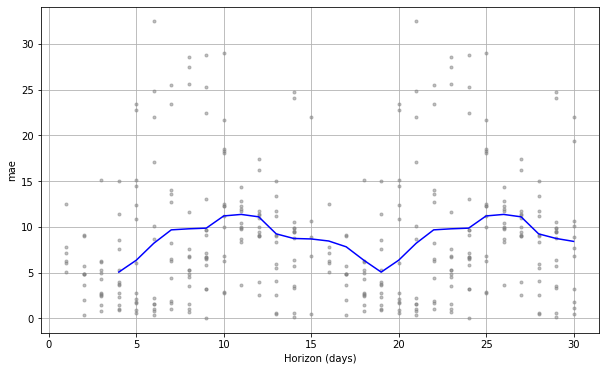

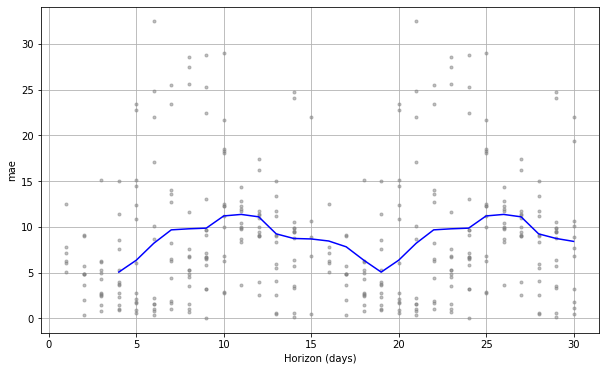

In [ ]:
 from fbprophet.plot import plot_cross_validation_metric
 plot_cross_validation_metric(cv,metric = 'mae')

In [1]:
col_list = ["date","price"]
import pandas as pd
df = pd.read_csv("Wheat Flour Rajshahi Division.csv", usecols=col_list,parse_dates = ['date'])
df.head()

,date,price
0,2006-07-15,20.0000
1,2006-08-15,20.3636
2,2006-09-15,21.1667
3,2006-10-15,21.6154
4,2006-11-15,23.4545


In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import sys
import numpy as np
import time
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from functools import reduce

from darts import TimeSeries
from darts.models import (
    NaiveDrift,
    NaiveSeasonal,
    Prophet,
    ExponentialSmoothing,
    ARIMA,
    RegressionEnsembleModel,
    RegressionModel,
    Theta,
    FFT,
    RNNModel,
    NaiveEnsembleModel,
    NBEATSModel,
    TCNModel,
    AutoARIMA,
    TBATS
    
)

from darts.metrics import mae
from darts .utils.statistics import check_seasonality, plot_acf, plot_residuals_analysis

import warnings
warnings.filterwarnings('ignore')

import logging 
logging.disable(logging.CRITICAL)

In [3]:
series = TimeSeries.from_dataframe(df, 'date','price',fill_missing_dates=True, freq='SM')
series.head()

<TimeSeries (DataArray) (date: 5, component: 1, sample: 1)>
array([[[20.    ]],

       [[    nan]],

       [[20.3636]],

       [[    nan]],

       [[21.1667]]])
Coordinates:
  * date       (date) datetime64[ns] 2006-07-15 2006-07-31 ... 2006-09-15
  * component  (component) object 'price'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

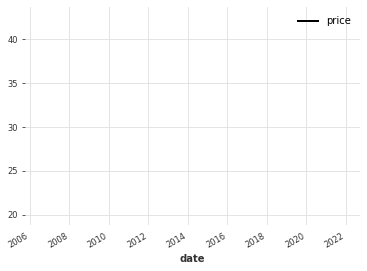

In [4]:
series.plot()

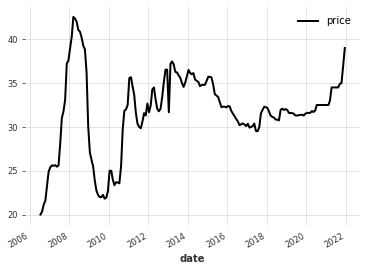

In [5]:
import darts
series = darts.utils.missing_values.fill_missing_values(series, fill='auto',)
series.plot()

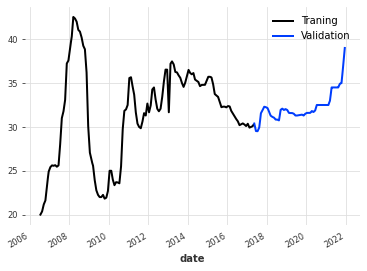

In [6]:
train, val = series.split_after(0.7)
train.plot(label = 'Traning')
val.plot(label = 'Validation')
plt.legend()

In [7]:
from darts.dataprocessing.transformers import Scaler

scaler = Scaler()
train_scaled = scaler.fit_transform([train])

#train_scaled.plot()


Training: 0it [00:00, ?it/s]

Predicting: 8it [00:00, ?it/s]

TCNModel = MAE :  0.8658658687993468


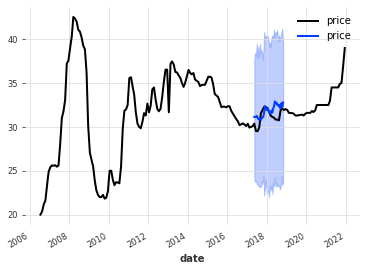

In [8]:
from darts.utils.likelihood_models import LaplaceLikelihood

model = TCNModel(
    input_chunk_length=24,
    output_chunk_length=12,
    random_state=42,
    likelihood=LaplaceLikelihood(),
)

model.fit(train_scaled, epochs=400, verbose=True);

pred = model.predict(n=36, num_samples=500)

# scale back:
pred = scaler.inverse_transform(pred)

series.plot()
pred.plot()

print("TCNModel = MAE : ",mae(series,pred))

Training: 0it [00:00, ?it/s]

Predicting: 8it [00:00, ?it/s]

NBEATSModel = MAE :  5.6572284560905315


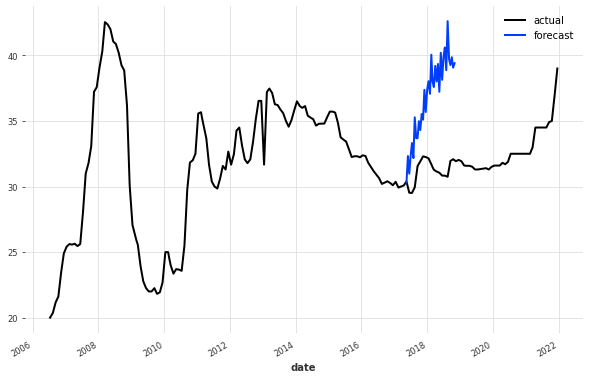

In [8]:
from darts.models import NBEATSModel

model = NBEATSModel(input_chunk_length=24, output_chunk_length=12, random_state=42)

model.fit(train_scaled, epochs=50, verbose=True);

pred = model.predict(n=36)


# scale back:
pred = scaler.inverse_transform(pred)

plt.figure(figsize=(10, 6))
series.plot(label="actual")
pred.plot(label="forecast")


print("NBEATSModel = MAE : ",mae(series,pred))

In [9]:
def evaluate_model(m):
    m.fit(train)
    forecast = m.predict(len(val))
    print("Model {} obtains MAE :{:}".format(m,mae(val,forecast)))

#evaluate_model(ExponentialSmoothing())
evaluate_model(TBATS())
evaluate_model(AutoARIMA())
evaluate_model(Theta())
evaluate_model(NaiveDrift())
evaluate_model(NaiveSeasonal())
evaluate_model(Prophet())
evaluate_model(ARIMA())
#evaluate_model(RegressionEnsembleModel())
#evaluate_model(RegressionModel())
evaluate_model(FFT())

Model (T)BATS obtains MAE :1.6327137904703748
Model Auto-ARIMA obtains MAE :1.6116181820797042
Model Theta(2) obtains MAE :3.1767165772880652
Model Naive drift model obtains MAE :0.8617513217851064
Model Naive seasonal model, with K=1 obtains MAE :2.0228644144144146
Model Prophet obtains MAE :1.6543546397757565
Model ARIMA(12, 1, 0) obtains MAE :1.6662663575241707
Model FFT(nr_freqs_to_keep=10, trend=None) obtains MAE :6.412983563276783


  0%|          | 0/147 [00:00<?, ?it/s]

NaiveEnsembleModel = MAE =  0.6273422068994531


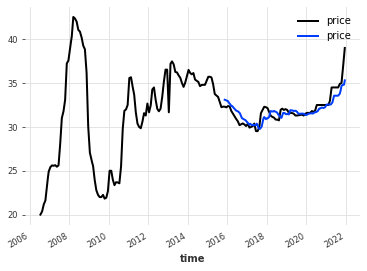

In [10]:
from darts.models import NaiveEnsembleModel

models = [NaiveDrift(), NaiveSeasonal(12)]

ensemble_model = NaiveEnsembleModel(models=models)

backtest = ensemble_model.historical_forecasts(
    series, start=0.6, forecast_horizon=3, verbose=True
)

print("NaiveEnsembleModel = MAE = " , (mae(backtest, series)))
series.plot()
backtest.plot()

Training: 0it [00:00, ?it/s]

  0%|          | 0/147 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 7it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 7it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 7it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 7it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 7it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 7it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 7it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 7it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 7it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 7it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 7it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 7it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 7it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 7it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 7it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 7it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 7it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 7it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 7it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 7it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 7it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 7it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 7it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 7it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 7it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 7it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 7it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 8it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 8it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 8it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 8it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 8it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 8it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 8it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 8it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 8it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 8it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 8it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 8it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 8it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 8it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 8it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 8it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 8it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 8it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 8it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 8it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 8it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 8it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 8it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 8it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 8it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 8it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 8it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 8it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 8it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 8it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 8it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 8it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 9it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 9it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 9it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 9it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 9it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 9it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 9it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 9it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 9it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 9it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 9it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 9it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 9it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 9it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 9it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 9it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 9it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 9it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 9it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 9it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 9it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 9it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 9it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 9it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 9it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 9it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 9it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 9it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 9it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 9it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 9it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 9it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 10it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 10it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 10it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 10it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 10it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 10it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 10it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 10it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 10it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 10it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 10it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 10it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 10it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 10it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 10it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 10it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 10it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 10it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 10it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 10it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 10it [00:02, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 10it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 10it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 10it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 10it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 10it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 10it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 10it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 10it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 10it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 10it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 10it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 11it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 11it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 11it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 11it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 11it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 11it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 11it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 11it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 11it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 11it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 11it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 11it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 11it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 11it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 11it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 11it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 11it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 11it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 11it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 11it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 11it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 11it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 11it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 11it [00:00, ?it/s]

RNNModel = MAE =  0.5863967336220094


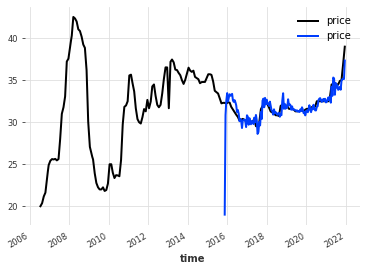

In [11]:
from darts.models import RNNModel

model = RNNModel(input_chunk_length=4)


model.fit(train_scaled)

backtest = model.historical_forecasts(series,start=0.6, forecast_horizon=3,verbose=True)
print("RNNModel = MAE = " , (mae(backtest, series)))
series.plot()
backtest.plot()